In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Get the numerical variables from our dataset.
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
nume_df = customer_df.select_dtypes(include = np.number)

display(customer_df.head())
display(nume_df.head())


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


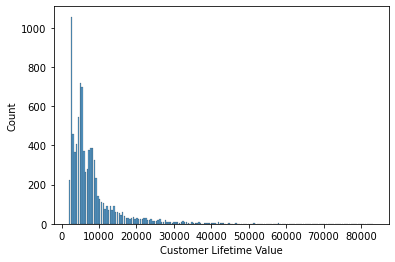

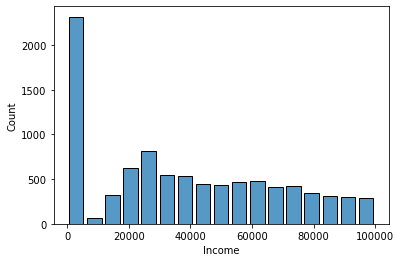

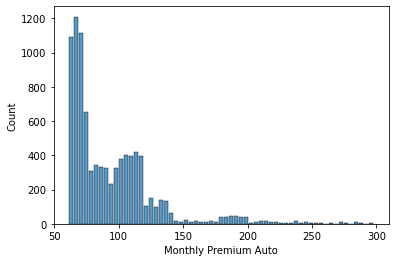

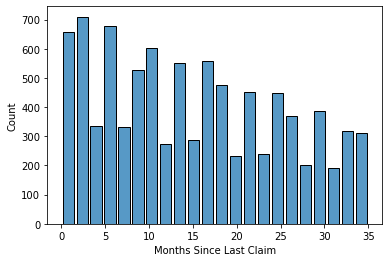

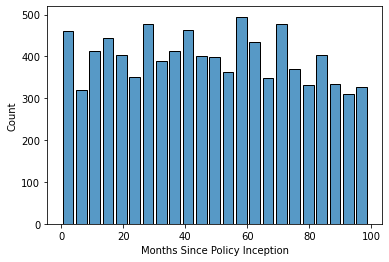

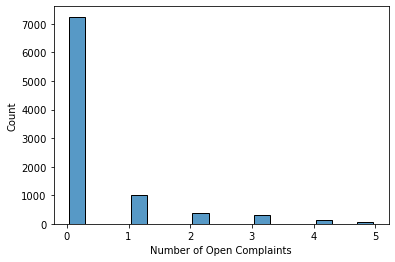

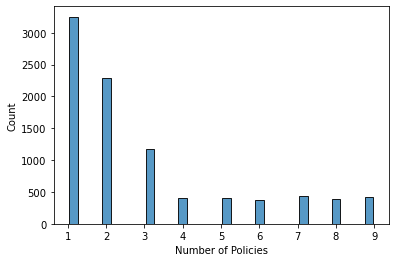

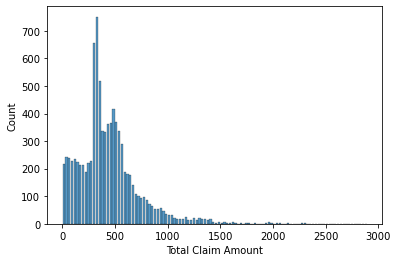

In [3]:
# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
sns.histplot(data = nume_df, x = "Customer Lifetime Value", shrink=.8)
plt.show()
sns.histplot(data = nume_df, x = "Income", shrink=.8)
plt.show()
sns.histplot(data = nume_df, x = "Monthly Premium Auto", shrink=.8)
plt.show()
sns.histplot(data = nume_df, x = "Months Since Last Claim", shrink=.8)
plt.show()
sns.histplot(data = nume_df, x = "Months Since Policy Inception", shrink=.8)
plt.show()
sns.histplot(data = nume_df, x = "Number of Open Complaints", shrink=.8)
plt.show()
sns.histplot(data = nume_df, x = "Number of Policies", shrink=.8)
plt.show()
sns.histplot(data = nume_df, x = "Total Claim Amount", shrink=.8)
plt.show()

# For income, monthly premium auto, number of open complaints and number of policies the exponential distribution fits best.
# Total claim amount shows a skewed distribution
# Month since las inception id the plot that resemblance the most to a normal distribution 

In [4]:
# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

from sklearn.preprocessing import MinMaxScaler
nume_df_1 = nume_df
scaler = MinMaxScaler()
scaler.fit(nume_df_1) 
nume_scaled = scaler.transform(nume_df_1)
nume_scaled_df = pd.DataFrame(nume_scaled, columns = nume_df_1.columns)
nume_scaled_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


In [5]:
nume_df_2 = nume_df
nume_df_log = nume_df_2.applymap(lambda x: np.log(x+1))
nume_df_log

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924622,10.938006,4.248495,3.496508,1.791759,0.000000,0.693147,5.955348
1,8.850881,0.000000,4.553877,2.639057,3.761200,0.000000,2.197225,7.032152
2,9.464085,10.794830,4.691348,2.944439,3.663562,0.000000,1.098612,6.341192
3,8.942051,0.000000,4.672829,2.944439,4.189655,0.000000,2.079442,6.274539
4,7.942608,10.688233,4.304065,2.564949,3.806662,0.000000,0.693147,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,11.183616,4.304065,2.944439,4.499810,0.000000,1.098612,5.294484
9130,8.038354,9.980680,4.382027,2.708050,3.367296,0.000000,0.693147,5.940697
9131,9.007599,0.000000,4.454347,2.302585,3.637586,1.386294,1.098612,6.674290
9132,8.926045,9.996158,4.574711,3.555348,1.386294,0.000000,1.386294,6.539875


In [12]:
nume_df_3 = nume_df
from sklearn.preprocessing import StandardScaler  

transformer = StandardScaler()

transformer.fit(nume_df_3)
nume_standard = transformer.transform(nume_df_3)
nume_standard_df = pd.DataFrame(nume_standard, columns = nume_df_3.columns)
nume_standard_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


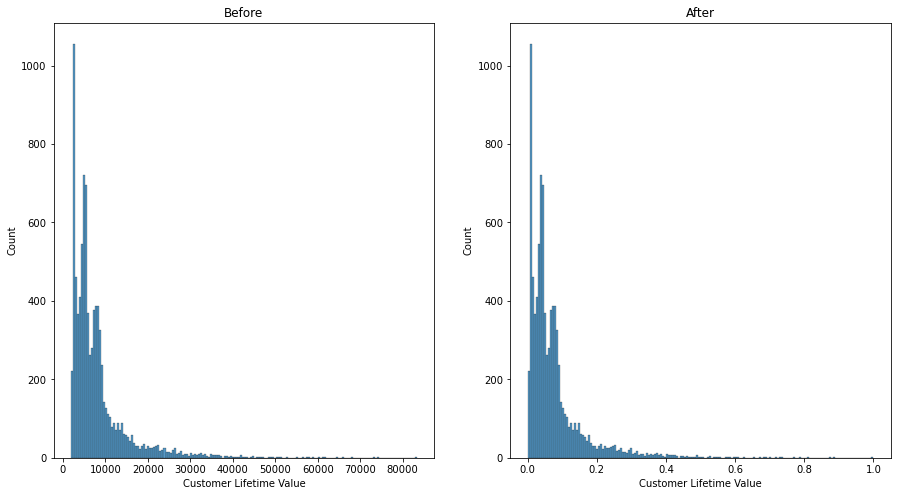

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x = "Customer Lifetime Value", data = nume_df, ax = ax[0])
ax[0].set_title("Before")

sns.histplot(x = 'Customer Lifetime Value', data = nume_scaled_df, ax = ax[1])
ax[1].set_title("After MixMaxScaler")

plt.show()

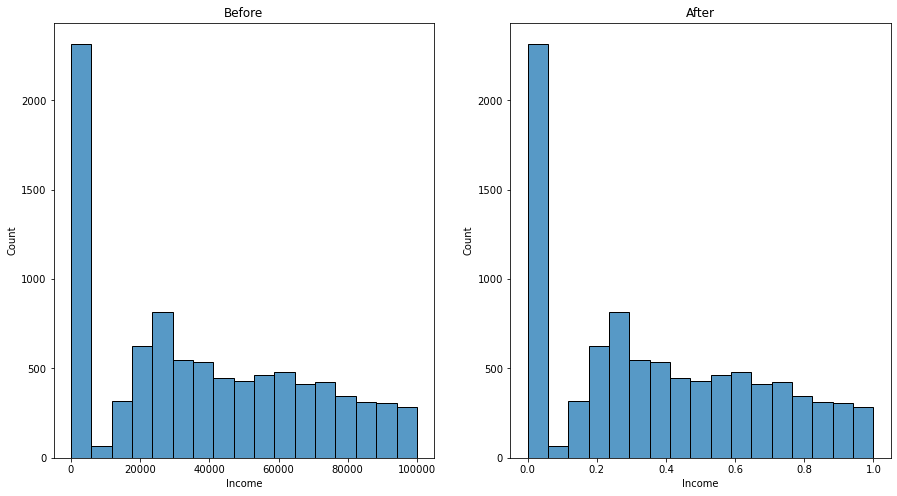

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x = "Income", data = nume_df, ax = ax[0])
ax[0].set_title("Before")

sns.histplot(x = 'Income', data = nume_scaled_df, ax = ax[1])
ax[1].set_title("After MixMaxScaler")

plt.show()

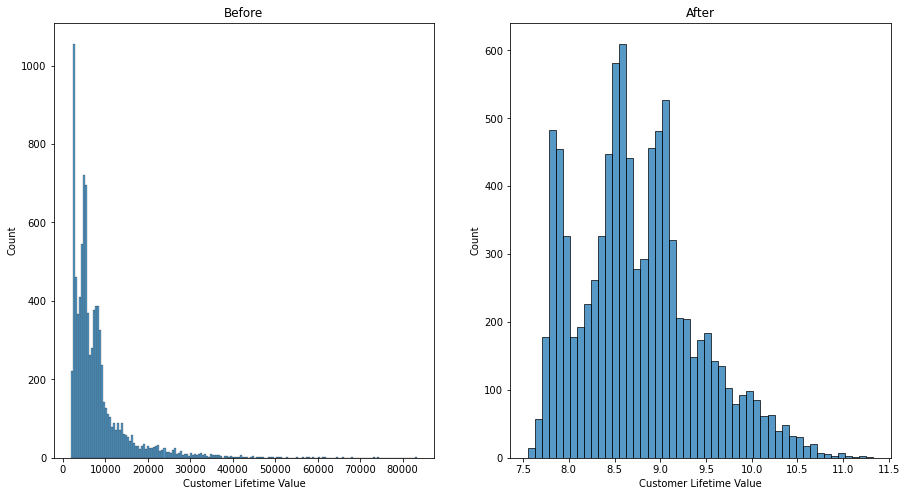

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x = "Customer Lifetime Value", data = nume_df, ax = ax[0])
ax[0].set_title("Before")

sns.histplot(x = 'Customer Lifetime Value', data = nume_df_log, ax = ax[1])
ax[1].set_title("After Log")

plt.show()

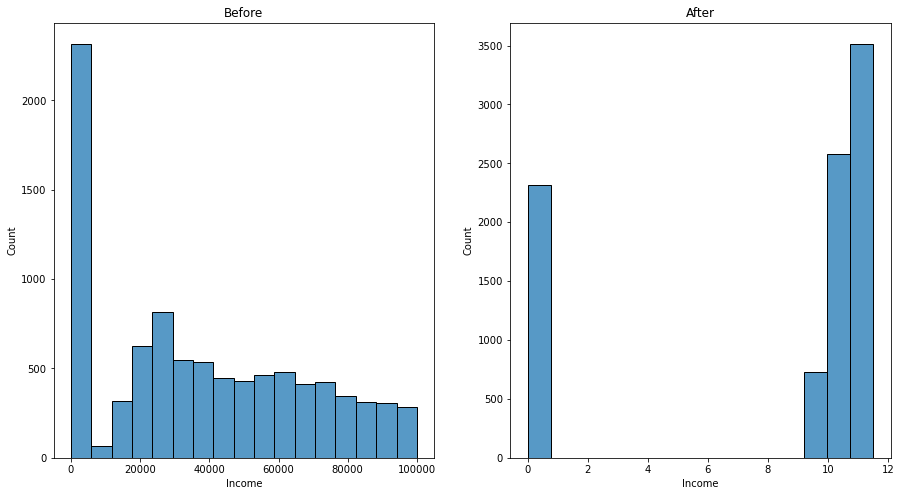

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x = "Income", data = nume_df, ax = ax[0])
ax[0].set_title("Before")

sns.histplot(x = 'Income', data = nume_df_log, ax = ax[1])
ax[1].set_title("After Log")

plt.show()

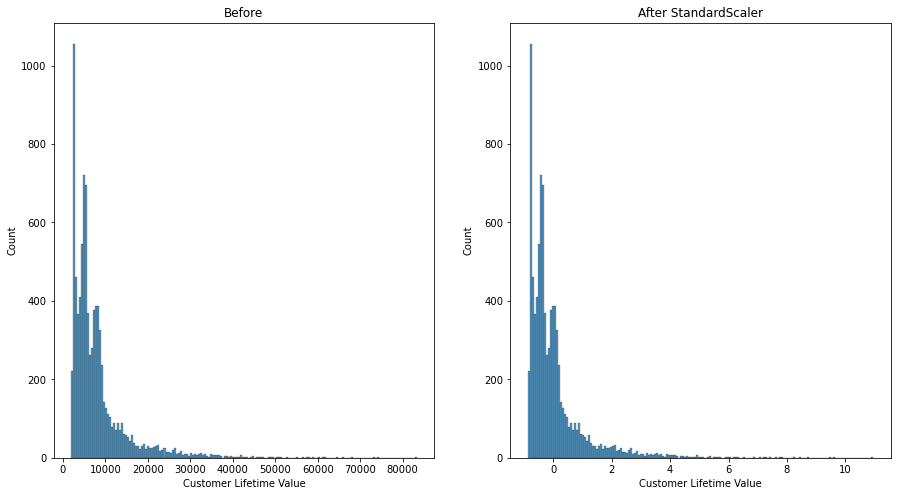

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x = "Customer Lifetime Value", data = nume_df, ax = ax[0])
ax[0].set_title("Before")

sns.histplot(x = 'Customer Lifetime Value', data = nume_standard_df, ax = ax[1])
ax[1].set_title("After StandardScaler")

plt.show()

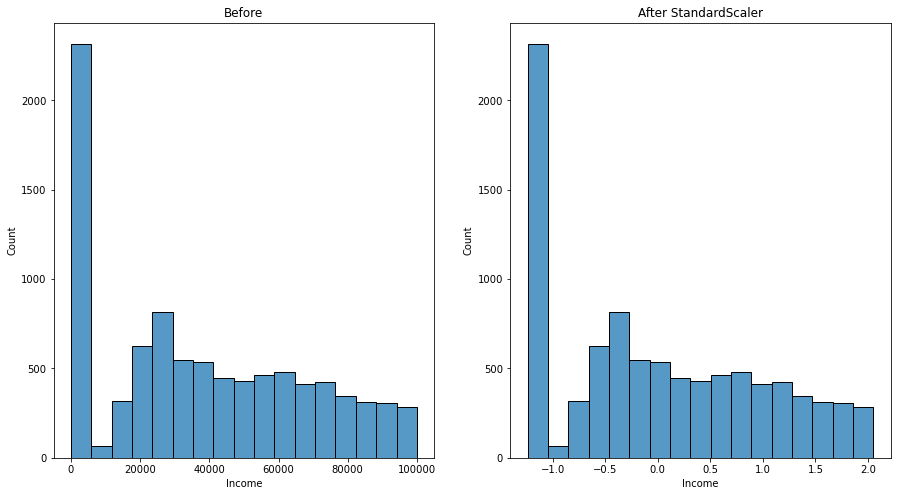

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x = "Income", data = nume_df, ax = ax[0])
ax[0].set_title("Before")

sns.histplot(x = 'Income', data = nume_standard_df, ax = ax[1])
ax[1].set_title("After StandardScaler")

plt.show()